### Import Libraries

In [5]:
!pip  install xgboost
!pip install imblearn 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 173.5 MB 476 kB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import multiprocessing as mp
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import random 
from sklearn.model_selection import train_test_split
random.seed(43)
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
import numpy as np

In [8]:
dataframe = pd.read_csv('task_2.csv')

In [11]:
dataset = pd.DataFrame(dataframe)
purchase = pd.DataFrame(dataframe)

In [12]:
X = dataset.drop(['original_session_id_hash','is_purchased-last','Unnamed: 0','session_id_hash'], axis= 1)
y = purchase['is_purchased-last']

### Over-under Sampling 

In [14]:
sampler = SMOTETomek()
X_us, y_us = sampler.fit_resample(X, y)

In [15]:
#split with dataset 

X_trains, X_tests, y_trains, y_tests = train_test_split(X_us, y_us, test_size=0.25, random_state=5)

### Random Forrest 

In [16]:

rlfus = RandomForestClassifier(bootstrap = True,max_depth=110, max_features=4,min_samples_leaf = 5, min_samples_split= 10, n_estimators = 100)
rlfus.fit(X_trains, y_trains) 
rlfus_pred = rlfus.predict(X_tests)
rlfus_accuracy = accuracy_score(y_tests, rlfus_pred)
rlfus_error = 1 - rlfus_accuracy
rlfus_probs = rlfus.predict_proba(X_tests)
print(rlfus_accuracy, rlfus_error)

0.9301659988551803 0.06983400114481975


### Gradient Boost

In [17]:
clfus = GradientBoostingClassifier()
clfus = clfus.fit(X_trains, y_trains)
clfus_pred = clfus.predict(X_tests)
clfus.score(X_tests, y_tests)

0.9321694333142531

### XGboost

In [23]:
boost = XGBClassifier(learning_rate= 0.3,n_estimators=100,n_jobs=40, max_depth = 6,base_score = .5,booster='gbtree') 
boost.fit(X_trains, y_trains)

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:42:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=40,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
# make predictions for test data
boost_pred = boost.predict(X_tests)
# evaluate predictions
accuracy = accuracy_score(y_tests, boost_pred)
boost_error = 1 -accuracy
print(accuracy,boost_error)

0.9393245563823698 0.06067544361763022


In [25]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 292 kB 2.4 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


### Confusion Matrices/ Performance Measures

In [26]:
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    #if percent:
    #    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
   # else:
    #    group_percentages = blanks

    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_labels,group_counts)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

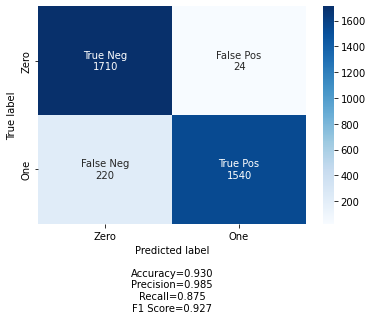

In [29]:
# Random Forest Confusion Matrix
rf_conf_matrix  = metrics.confusion_matrix(y_tests, rlfus_pred)
conf_mat_rf = pd.DataFrame(
    rf_conf_matrix, 
    columns=["Predicted NO", "Predicted YES"], 
    index=["Actual NO", "Actual YES"]
)
#print(conf_mat_rf)


labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(rf_conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

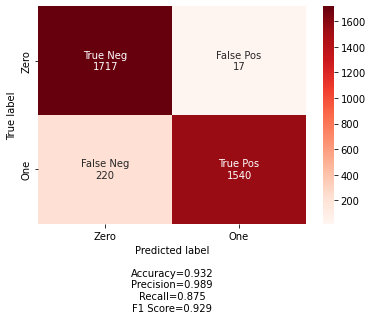

In [30]:
#Grdient Boost Confusion Matrix
clf1_conf_matrix  = metrics.confusion_matrix(y_tests, clfus_pred)
conf_mat_rf = pd.DataFrame(
    clf1_conf_matrix, 
    columns=["Predicted NO", "Predicted YES"], 
    index=["Actual NO", "Actual YES"]
)
#print(conf_mat_rf)


labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(clf1_conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

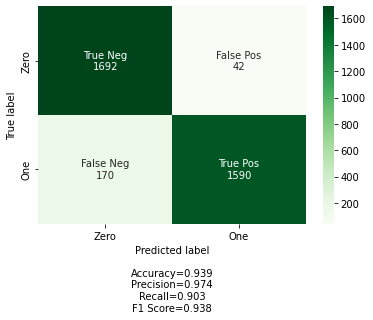

In [31]:
#XG Boost Confusion Matrix
xg_conf_matrix  = metrics.confusion_matrix(y_tests, boost_pred)
conf_mat_rf = pd.DataFrame(
    clf1_conf_matrix, 
    columns=["Predicted NO", "Predicted YES"], 
    index=["Actual NO", "Actual YES"]
)
#print(conf_mat_rf)


labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(xg_conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Greens')